In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')

In [6]:
df = pd.read_csv('nyc-rolling-sales.csv')
print(len(df))
df.head(10)

84548


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

In [8]:
# pd.plotting.scatter_matrix(df, figsize=(10,10));

# 1. Data Cleanup

In [9]:
# Rename BOROUGHS
df['BOROUGH'][df['BOROUGH'] == 1] = 'Manhattan'
df['BOROUGH'][df['BOROUGH'] == 2] = 'Bronx'
df['BOROUGH'][df['BOROUGH'] == 3] = 'Brooklyn'
df['BOROUGH'][df['BOROUGH'] == 4] = 'Queens'
df['BOROUGH'][df['BOROUGH'] == 5] = 'Staten Island'

/Users/adriansubagyo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
#drop EASE-MENT because its empty
del df['EASE-MENT']

#drop Unnamed: 0 because it doesn't mean anything
del df['Unnamed: 0']

In [11]:
# df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='ignore')
# df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='ignore')
# df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='ignore')

#Convert Sale Date data to datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
#Convert to categorical
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

df.dtypes
#Convert 'SALE PRICE','GROSS SQUARE FEET', & 'LAND SQUARE FEET' to numeric
df[['SALE PRICE','LAND SQUARE FEET','GROSS SQUARE FEET']] = df[['SALE PRICE','LAND SQUARE FEET','GROSS SQUARE FEET']].convert_objects(convert_numeric=True)


/Users/adriansubagyo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  del sys.path[0]


In [12]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [13]:
#check duplicate
sum(df.duplicated(df.columns))

765

In [14]:
#Delete duplicates
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [15]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
BOROUGH                           83783 non-null object
NEIGHBORHOOD                      83783 non-null object
BUILDING CLASS CATEGORY           83783 non-null object
TAX CLASS AT PRESENT              83783 non-null category
BLOCK                             83783 non-null int64
LOT                               83783 non-null int64
BUILDING CLASS AT PRESENT         83783 non-null object
ADDRESS                           83783 non-null object
APARTMENT NUMBER                  83783 non-null object
ZIP CODE                          83783 non-null int64
RESIDENTIAL UNITS                 83783 non-null int64
COMMERCIAL UNITS                  83783 non-null int64
TOTAL UNITS                       83783 non-null int64
LAND SQUARE FEET                  57729 non-null float64
GROSS SQUARE FEET                 56398 non-null float64
YEAR BUILT                        83783 non-null int6

In [16]:
variables = df.columns

count = []

for variable in variables:
    length = df[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(df), 2)

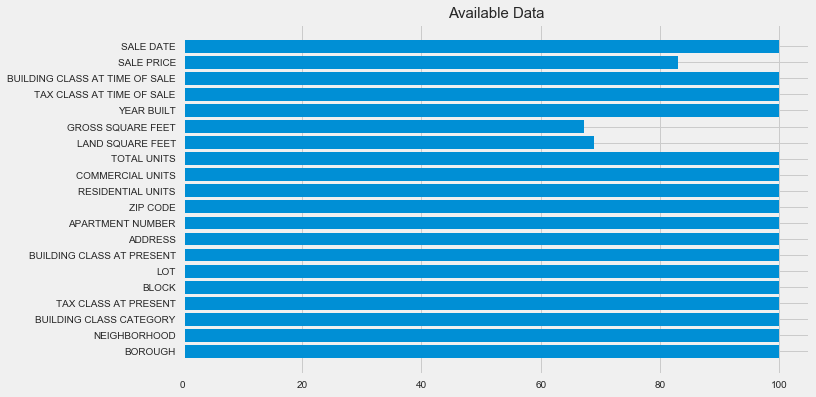

In [17]:
plt.figure(figsize=(10,6))
plt.barh(variables, count_pct)
plt.title('Available Data', fontsize=15)
plt.show()

Identified 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE' needs to be cleaned up

In [18]:
df = df[df['SALE PRICE'].notnull()] 
df = df[df['LAND SQUARE FEET'].notnull()] 
df = df[df['GROSS SQUARE FEET'].notnull()] 
df.shape

(47896, 20)

In [19]:
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,47896.000000,47896.000000,47896.000000,47896.000000,47896.000000,47896.000000,4.789600e+04,4.789600e+04,47896.000000,4.789600e+04
mean,4994.514970,234.777205,10940.163500,2.534888,0.237473,2.791319,3.270904e+03,3.525875e+03,1828.445152,1.158310e+06
std,3429.465212,495.924368,1074.738599,17.169930,10.845527,20.427834,3.054984e+04,2.920511e+04,463.083421,1.344264e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2223.750000,21.000000,10469.000000,1.000000,0.000000,1.000000,1.400750e+03,8.157500e+02,1920.000000,1.000000e+05
50%,4666.000000,45.000000,11217.000000,1.000000,0.000000,1.000000,2.133000e+03,1.620000e+03,1931.000000,4.850000e+05
75%,7008.000000,94.000000,11238.000000,2.000000,0.000000,2.000000,3.050000e+03,2.508000e+03,1961.000000,8.350000e+05
max,16319.000000,9009.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.210000e+09


'ZIP CODE' (0) - wrong / missing input

'RESIDENTIAL UNITS' - 50% of the data (1) 

'COMMERCIAL UNITS' - 75% of the data is (0)

'LAND SQUARE FEET' - some data is (0) - wrong / missing input

'GROSS SQUARE FEET' - some data is (0) - wrong / missing input

'YEAR BUILT' - some data is (0) - wrong / missing input

'SALE PRICE' - some data is (0) - wrong / missing input

# Data Preprocessing

### Looking at 'SALES PRICE'

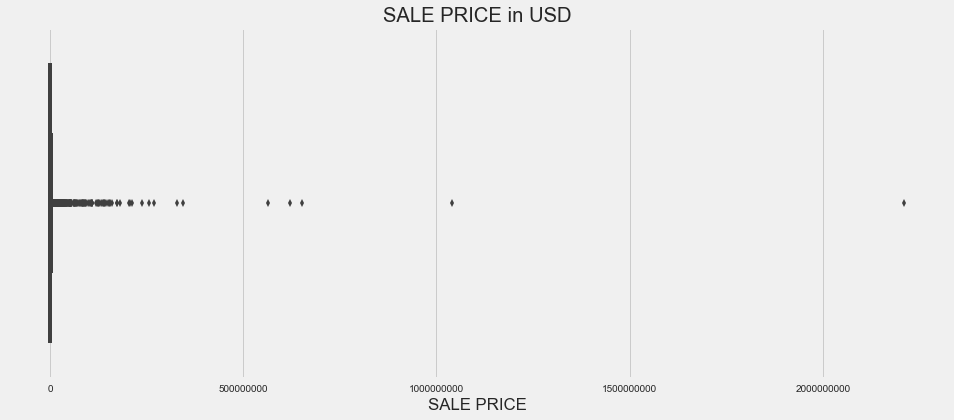

In [20]:
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('SALE PRICE in USD')
plt.show()

Observe only data below 2 Million USD 'SALE PRICE'

In [21]:
#Observe only data below 2 Mil
df1 = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 3000000)]
len(df1)

33964

/Users/adriansubagyo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


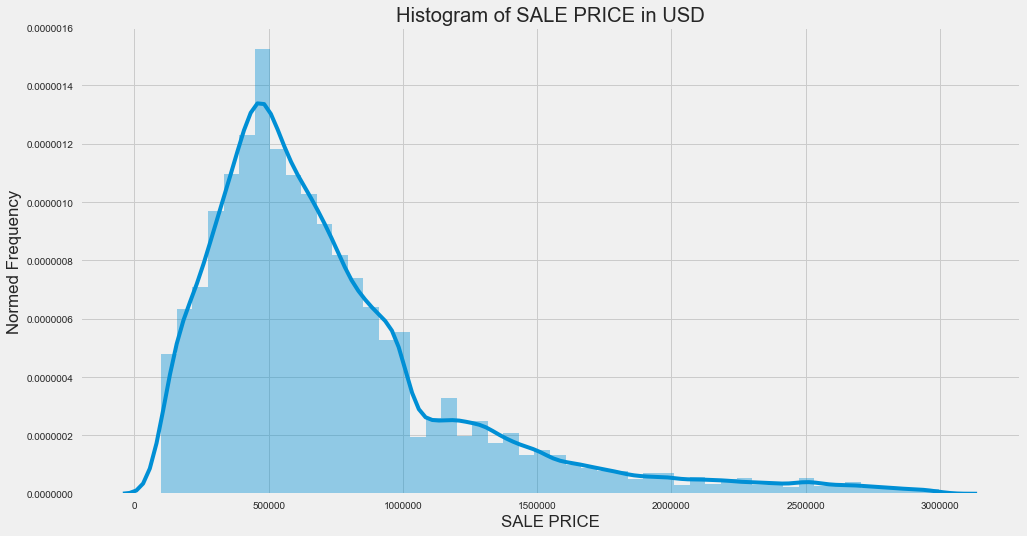

In [22]:
plt.figure(figsize=(15,8))

sns.distplot(df1['SALE PRICE'])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Normed Frequency')
plt.show()

normalize

/Users/adriansubagyo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


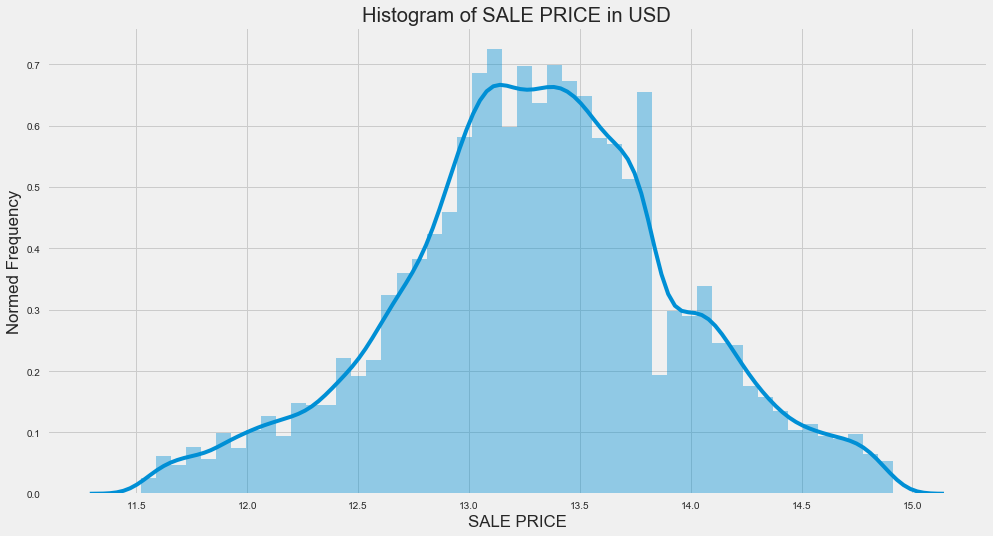

In [23]:
plt.figure(figsize=(15,8))

sns.distplot(np.log(df1['SALE PRICE']))
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Normed Frequency')
plt.show()

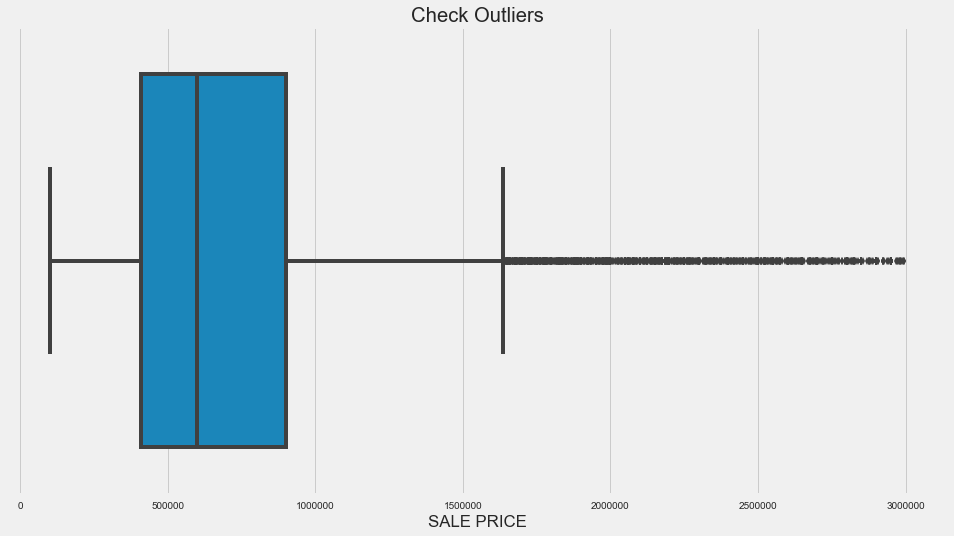

In [24]:
#Check outliers
plt.figure(figsize=(15,8))

sns.boxplot(x='SALE PRICE', data=df1)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Check Outliers')
plt.show()

majority of sale price is form 100,000 to 1.6M

### 'GROSS SQUARE FEET' & 'LAND SQUARE FEET'

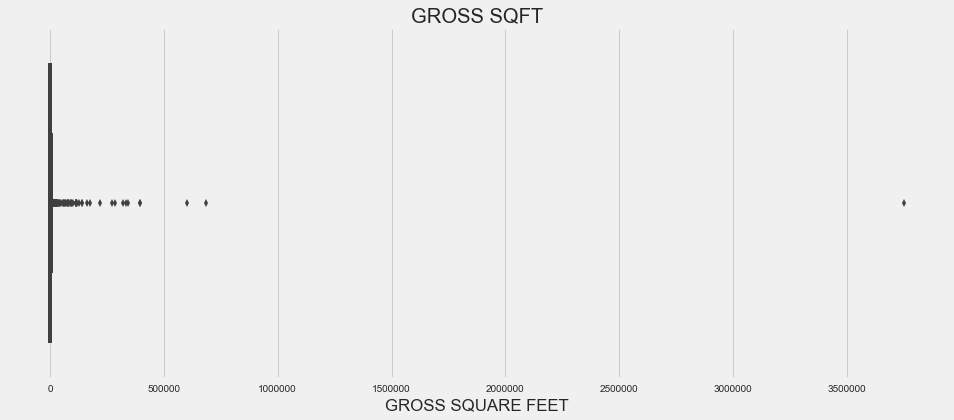

In [25]:
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='GROSS SQUARE FEET', data=df1)
plt.ticklabel_format(style='plain', axis='x')
plt.title('GROSS SQFT')
plt.show()

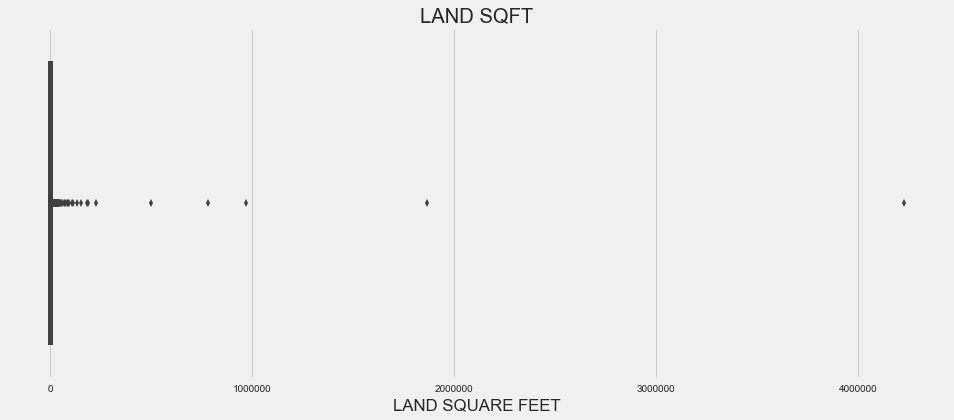

In [26]:
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='LAND SQUARE FEET', data=df1)
plt.ticklabel_format(style='plain', axis='x')
plt.title('LAND SQFT')
plt.show()

Observe only data below 20000 square feet'GROSS SQUARE FEET' & 'LAND SQUARE FEET'

In [27]:
df2 = df1[df1['GROSS SQUARE FEET'] < 20000]
df2 = df1[df1['LAND SQUARE FEET'] < 20000]
len(df2)

33878

/Users/adriansubagyo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


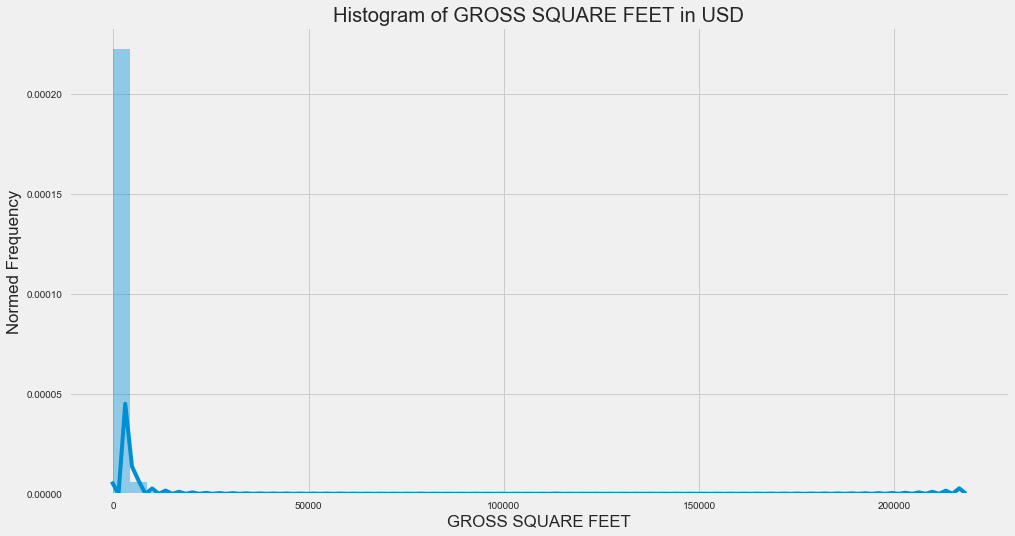

In [28]:
plt.figure(figsize=(15,8))

sns.distplot(df2['GROSS SQUARE FEET'])
plt.title('Histogram of GROSS SQUARE FEET in USD')
plt.ylabel('Normed Frequency')
plt.show()

/Users/adriansubagyo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


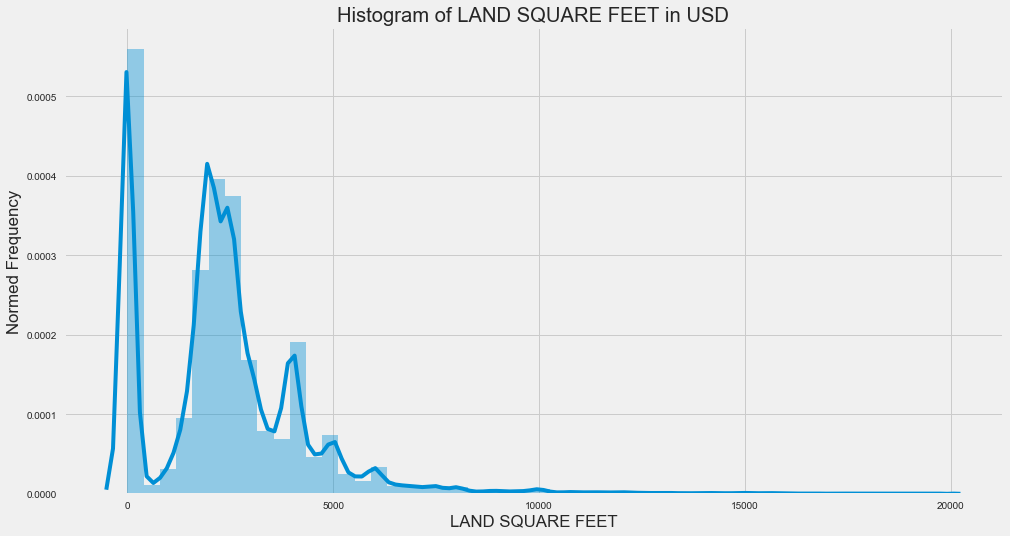

In [29]:
plt.figure(figsize=(15,8))

sns.distplot(df2['LAND SQUARE FEET'])
plt.title('Histogram of LAND SQUARE FEET in USD')
plt.ylabel('Normed Frequency')
plt.show()

# 2. Exploratory Data Analysis

### CORRELATION BETWEEN 'SALE PRICE' & 'GROSS SQUARE FEET'

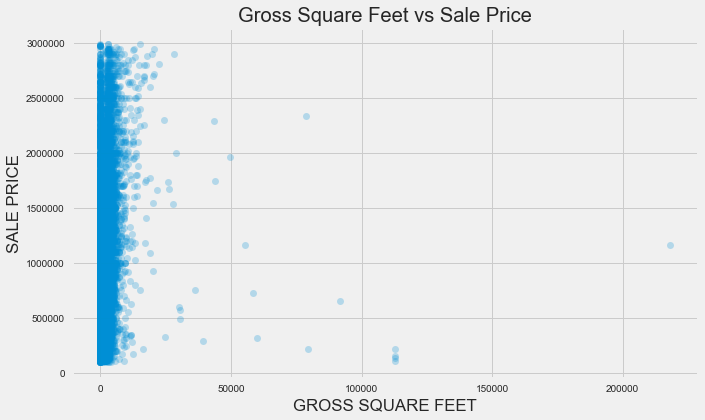

In [30]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df2, fit_reg=False, scatter_kws={'alpha':0.25})
plt.title('Gross Square Feet vs Sale Price')
plt.show()

In [31]:
df2[['GROSS SQUARE FEET', 'SALE PRICE']].corr()

,GROSS SQUARE FEET,SALE PRICE
GROSS SQUARE FEET,1.000000,0.204085
SALE PRICE,0.204085,1.000000


### CORRELATION BETWEEN 'SALE PRICE' & 'LAND SQUARE FEET'

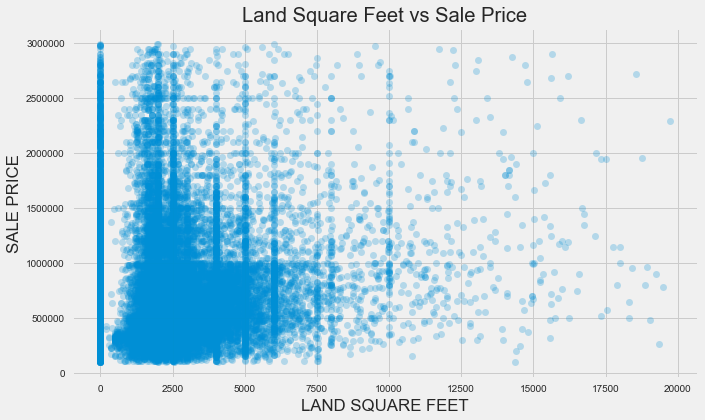

In [32]:
plt.figure(figsize=(10,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df2, fit_reg=False, scatter_kws={'alpha':0.25})
plt.title('Land Square Feet vs Sale Price')
plt.show()

In [33]:
df2[['LAND SQUARE FEET', 'SALE PRICE']].corr()

,LAND SQUARE FEET,SALE PRICE
LAND SQUARE FEET,1.000000,0.102654
SALE PRICE,0.102654,1.000000


### Total Units

In [34]:
df2.sort_values(by=['TOTAL UNITS'], ascending = False)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
64831,Queens,JAMAICA,33 EDUCATIONAL FACILITIES,4,9827,39,W9,87-74 172ND STREET,,11432,0,2261,2261,2940.0,4522.0,1920,4,W9,315000.0,2016-10-26
10125,Manhattan,MURRAY HILL,10 COOPS - ELEVATOR APARTMENTS,2,915,38,D4,240 EAST 35TH STREET,,10016,121,0,121,12343.0,91745.0,1955,2,D4,650000.0,2017-02-03
7837,Manhattan,MIDTOWN EAST,10 COOPS - ELEVATOR APARTMENTS,2,1341,44,D4,310 EAST 49TH STREET,,10017,102,0,102,7531.0,60043.0,1959,2,D4,318000.0,2017-04-12
20650,Bronx,KINGSBRIDGE/JEROME PARK,08 RENTALS - ELEVATOR APARTMENTS,2,3258,5,D1,3333 GILES PLACE,,10463,63,0,63,19722.0,43370.0,2004,2,D1,2295000.0,2017-06-29
34504,Brooklyn,CROWN HEIGHTS,07 RENTALS - WALKUP APARTMENTS,2,1387,7,C7,261 BUFFALO AVENUE,,11213,42,6,48,12000.0,44000.0,1922,2,C7,1747315.0,2017-06-30
64302,Queens,JACKSON HEIGHTS,10 COOPS - ELEVATOR APARTMENTS,2,1443,6,D4,82-16 34TH AVENUE,,11372,48,0,48,9500.0,39162.0,1930,2,D4,289000.0,2017-03-07
19606,Bronx,CASTLE HILL/UNIONPORT,07 RENTALS - WALKUP APARTMENTS,2,3801,46,C1,2065 HAVILAND AVENUE,,10472,47,0,47,14224.0,49720.0,1929,2,C1,1962500.0,2017-05-24
29793,Brooklyn,BOROUGH PARK,07 RENTALS - WALKUP APARTMENTS,2,5606,29,C1,1472 43RD STREET,,11219,39,0,39,8300.0,36105.0,1927,2,C1,750000.0,2017-08-02
7043,Manhattan,MANHATTAN VALLEY,07 RENTALS - WALKUP APARTMENTS,2,1836,20,C4,4 MANHATTAN AVENUE,,10025,36,0,36,3550.0,14268.0,1900,2,C4,2350000.0,2017-03-23
3028,Manhattan,FLATIRON,21 OFFICE BUILDINGS,4,856,9,O4,11-13 EAST 26TH STREET,,10010,0,35,35,11553.0,217991.0,1913,4,O4,1159531.0,2016-12-20


There are some 'TOTAL UNITS' input that are wrong and not matching of sum 'RESIDENTIAL UNITS' AND 'COMMERCIAL UNITS'

In [35]:
df3 = df2[df2['TOTAL UNITS'] == df2['COMMERCIAL UNITS'] + df2['RESIDENTIAL UNITS']]
df3 = df2[(df2['TOTAL UNITS'] > 0) & (df2['TOTAL UNITS'] < 100)]
df3.shape

(30144, 20)

In [36]:
to_plot = df3.groupby('BOROUGH')['TOTAL UNITS'].sum().sort_values(ascending=False)
to_plot.head()

BOROUGH
Brooklyn         20740
Queens           16877
Bronx             7481
Staten Island     6393
Manhattan         1211
Name: TOTAL UNITS, dtype: int64

Number of available unit in every borough

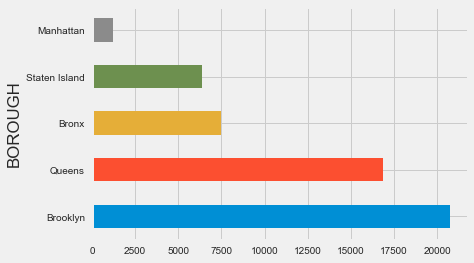

In [37]:
to_plot.head().plot(kind='barh')

In [38]:
df3.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
222,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765,25,C4,219 WEST 15TH STREET,,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31
223,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765,25,C4,219 WEST 15TH STREET,,10011,9,0,9,1566.0,6330.0,1901,2,C4,416790.0,2017-08-31
224,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765,25,C4,219 WEST 15TH STREET,,10011,9,0,9,1566.0,6330.0,1901,2,C4,630370.0,2017-08-31
239,Manhattan,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,2,794,11,D7,155 WEST 18TH,,10011,30,2,32,10053.0,78882.0,2014,2,D7,2341975.0,2016-10-28
277,Manhattan,CHELSEA,09 COOPS - WALKUP APARTMENTS,2,744,32,C6,309 WEST 20TH STREET,,10011,24,0,24,4600.0,12200.0,1850,2,C6,282000.0,2016-10-19


In [39]:
dfr = df3[~df1['BUILDING CLASS CATEGORY'].str.contains("OFFICE|STORE|LOFT|HOTELS|TAX CLASS|FACTORIES|COMMERCIAL|WAREHOUSES|FACILITIES|ASYLUMS")]
dfr['BUILDING CLASS CATEGORY'].unique()

dfr['RESI'] = 1

/Users/adriansubagyo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/adriansubagyo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [40]:
dfc = df3[df1['BUILDING CLASS CATEGORY'].str.contains("OFFICE|STORE|LOFT|HOTELS|TAX CLASS|FACTORIES|COMMERCIAL|WAREHOUSES|FACILITIES|ASYLUMS")]
dfc['BUILDING CLASS CATEGORY'].unique()

dfc['RESI'] = 0

/Users/adriansubagyo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/adriansubagyo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [41]:
df5 = dfr.append(dfc)
df5.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,RESI
83909,Staten Island,WEST NEW BRIGHTON,37 RELIGIOUS FACILITIES,4,177,103,M1,1009 CASTLETON AVENUE,3,10310,...,1,1,1900.0,2140.0,1940,4,M1,386820.0,2017-01-16,0
84172,Staten Island,WESTERLEIGH,21 OFFICE BUILDINGS,4,393,10,O7,1436 FOREST AVENUE,,10302,...,1,1,3180.0,1224.0,1920,4,O7,380000.0,2017-05-25,0
84174,Staten Island,WESTERLEIGH,21 OFFICE BUILDINGS,4,476,52,O7,201 BRYSON AVENUE,,10314,...,1,1,6540.0,2845.0,1955,4,O7,800000.0,2016-11-18,0
84176,Staten Island,WESTERLEIGH,22 STORE BUILDINGS,4,462,19,K4,26 WATCHOGUE ROAD,,10314,...,1,3,7590.0,2220.0,1974,4,K4,920000.0,2017-05-01,0
84392,Staten Island,WILLOWBROOK,22 STORE BUILDINGS,4,2015,28,K1,2075 RICHMOND AVENUE,,10314,...,1,1,15640.0,6000.0,1983,4,K1,2900000.0,2017-01-27,0


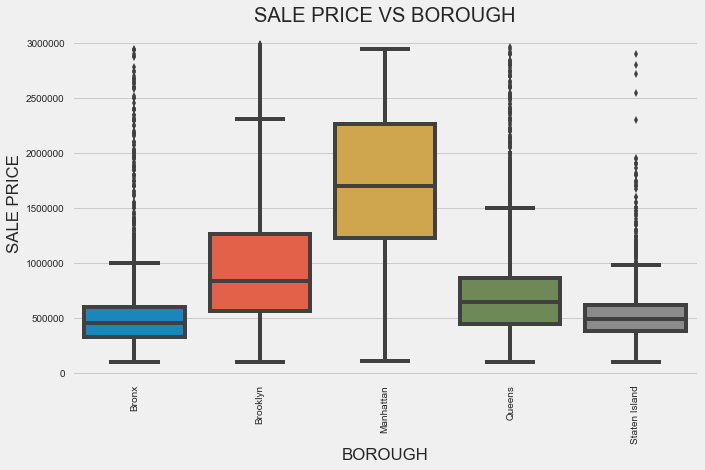

In [42]:
plt.figure(figsize=(10,6))
order = sorted(df5['BOROUGH'].unique())
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df3, order=order)
plt.xticks(rotation=90)
plt.title('SALE PRICE VS BOROUGH')
plt.show()

# CONCLUSION

- Property price depends a lot with Borough

- Almost all property price in Bronx and Staten islnd is < 1M.
- Median of property price in Brooklyn and Queens is <1M. 
- Almost 40% Brooklyn property is >1M
- Almost 80% Queens property is <1M





### BUILDING CLASS CATEGORY

In [51]:
a = df3['BUILDING CLASS CATEGORY'].unique()
a.sort()
print(a)

['01 ONE FAMILY DWELLINGS                    '
 '02 TWO FAMILY DWELLINGS                    '
 '03 THREE FAMILY DWELLINGS                  '
 '04 TAX CLASS 1 CONDOS                      '
 '05 TAX CLASS 1 VACANT LAND                 '
 '06 TAX CLASS 1 - OTHER                     '
 '07 RENTALS - WALKUP APARTMENTS             '
 '08 RENTALS - ELEVATOR APARTMENTS           '
 '09 COOPS - WALKUP APARTMENTS               '
 '10 COOPS - ELEVATOR APARTMENTS             '
 '11A CONDO-RENTALS                           '
 '12 CONDOS - WALKUP APARTMENTS              '
 '13 CONDOS - ELEVATOR APARTMENTS            '
 '14 RENTALS - 4-10 UNIT                     '
 '15 CONDOS - 2-10 UNIT RESIDENTIAL          '
 '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT '
 '21 OFFICE BUILDINGS                        '
 '22 STORE BUILDINGS                         '
 '23 LOFT BUILDINGS                          '
 '26 OTHER HOTELS                            '
 '27 FACTORIES                               '
 '28 COMMERC

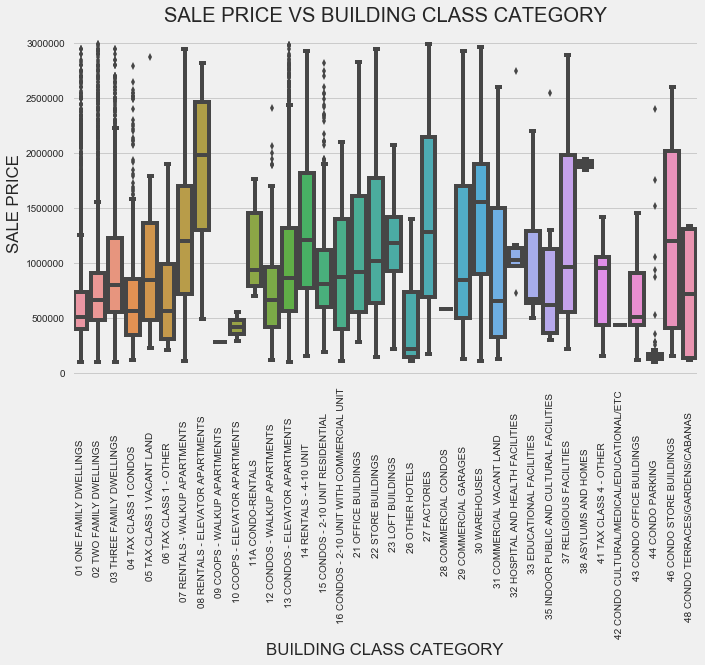

In [43]:
plt.figure(figsize=(10,6))
order = sorted(df5['BUILDING CLASS CATEGORY'].unique())
sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=df3, order=order)
plt.xticks(rotation=90)
plt.title('SALE PRICE VS BUILDING CLASS CATEGORY')
plt.show()

Certain building category has a lot of price variance would look into more simplified category

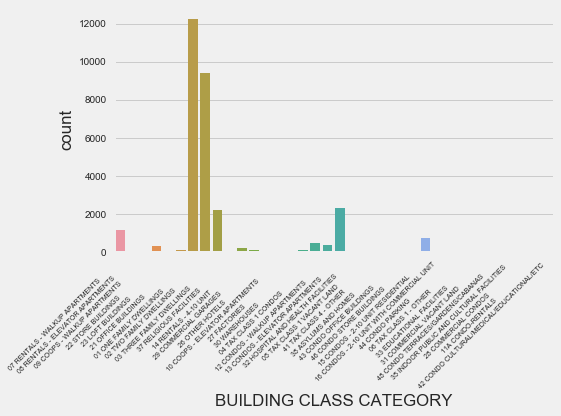

In [50]:
plt.figure(figsize=(8,6))
ax = sns.countplot(df3['BUILDING CLASS CATEGORY'],label="Count")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7, rotation=45, ha="right")
plt.tight_layout()
plt.show()

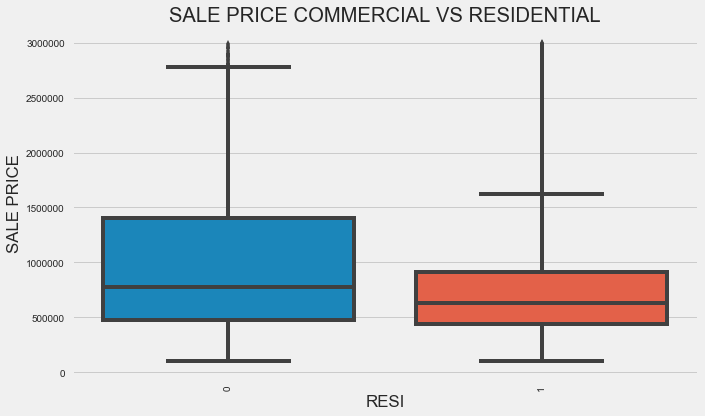

In [47]:
plt.figure(figsize=(10,6))
order = sorted(df5['RESI'].unique())
sns.boxplot(x='RESI', y='SALE PRICE', data=df5, order=order)
plt.xticks(rotation=90)
plt.title('SALE PRICE COMMERCIAL VS RESIDENTIAL')
plt.show()

# Price Over 1M

Would like to analyze data of sales price over 1M or below 1M

In [120]:
df5['OVER1M'] = (df5.loc[:,'SALE PRICE'] > 1000000).astype(int)
df5.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,RESI,OVER1M
222,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765,25,C4,219 WEST 15TH STREET,,10011,...,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31,1,1
223,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765,25,C4,219 WEST 15TH STREET,,10011,...,9,1566.0,6330.0,1901,2,C4,416790.0,2017-08-31,1,0
224,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765,25,C4,219 WEST 15TH STREET,,10011,...,9,1566.0,6330.0,1901,2,C4,630370.0,2017-08-31,1,0
239,Manhattan,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,2,794,11,D7,155 WEST 18TH,,10011,...,32,10053.0,78882.0,2014,2,D7,2341975.0,2016-10-28,1,1
277,Manhattan,CHELSEA,09 COOPS - WALKUP APARTMENTS,2,744,32,C6,309 WEST 20TH STREET,,10011,...,24,4600.0,12200.0,1850,2,C6,282000.0,2016-10-19,1,0


EXPORT CLEANED UP DATA

In [68]:
df5.to_csv('df5.csv')